## City Bike Analytics
### Data Source: https://www.citibikenyc.com/system-data
### ETL process
* Data of trips history for September (2019-2020)
* Saving result to csv file for further visualization with Tableau

#### Import libraries for analysis

In [2]:
library(ggplot2)
theme_set(
  theme_bw() +
    theme(legend.position = "top")
  )

In [3]:
library('lattice')
library(tidyverse)
library(plyr)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0
✔ purrr   0.3.4     

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

------------------------------------------------------------------------------

You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, please load plyr first, then dplyr:
library(plyr); library(dplyr)

------------------------------------------------------------------------------


Attaching package: ‘plyr’


The following objects are masked from ‘package:dplyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize


The following object is masked from ‘package:purrr’:

    compact




#### Load data
* September 2020

In [12]:
raw.data_2020 <- read.csv("data/JC-202009-citibike-tripdata.csv", stringsAsFactors=TRUE)
str(raw.data_2020)

'data.frame':	53833 obs. of  15 variables:
 $ tripduration           : int  222 193 273 1419 254 1621 293 1981 3465 641 ...
 $ starttime              : Factor w/ 53833 levels "2020-09-01 00:15:58.6470",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ stoptime               : Factor w/ 53832 levels "2020-09-01 00:19:40.8750",..: 1 2 3 5 4 6 7 8 16 10 ...
 $ start.station.id       : int  3186 3640 3191 3203 3194 3225 3212 3199 3203 3212 ...
 $ start.station.name     : Factor w/ 51 levels "5 Corners Library",..: 18 28 47 19 35 3 7 41 19 7 ...
 $ start.station.latitude : num  40.7 40.7 40.7 40.7 40.7 ...
 $ start.station.longitude: num  -74 -74.1 -74.1 -74 -74.1 ...
 $ end.station.id         : int  3276 3206 3694 3270 3679 3199 3640 3212 3199 3225 ...
 $ end.station.name       : Factor w/ 72 levels "12 Ave & W 40 St",..: 45 31 33 37 6 54 38 11 54 5 ...
 $ end.station.latitude   : num  40.7 40.7 40.7 40.7 40.7 ...
 $ end.station.longitude  : num  -74 -74.1 -74.1 -74 -74.1 ...
 $ bikeid                 : int

In [13]:
# Test for missing values
colSums(is.na(raw.data_2020))
na_index_list <- which(is.na(raw.data_2020))
na_index_list

tripduration               starttime                stoptime 
                      0                       0                       0 
       start.station.id      start.station.name  start.station.latitude 
                      0                       0                       0 
start.station.longitude          end.station.id        end.station.name 
                      0                       0                       0 
   end.station.latitude   end.station.longitude                  bikeid 
                      0                       0                       0 
               usertype              birth.year                  gender 
                      0                       0                       0

integer(0)

In [14]:
# Adding age column
raw.data_2020$age <- 2020 - raw.data_2020$birth.year
summary(raw.data_2020$age)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
     16      29      35      38      51      90 

In [15]:
# Checking for unusual data
raw.data_2020$age[raw.data_2020$age>70]

[1] 71 74 74 74 71 71 71 71 72 71 90 71 71 71 71 71 73 71 71 74 74 74 74 74 74
 [26] 74 74 71 71 71 71 71 72 74 71 71 71 71 71 71 74 74 74 74 71 71 74 71 71 74
 [51] 71 71 73 71 87 87 71 76 71 71 71 71 74 74 74 74 71 74 71 71 71 71 71 71 71
 [76] 71 71 71 74 71 74 74 71 71 71 76 76 71 71 71 76 71 71 71 71 71 74 74 74 74
[101] 74 71 76 71 71 71 71 71 71 71 71 71

In [16]:
# Filter raw data to clean data
clean.data_2020 <- raw.data_2020 %>% filter(raw.data_2020$age<100)

In [17]:
# Adding column with log transformed trip duration
clean.data_2020$log_trip <- log(clean.data_2020$tripduration)

In [18]:
# Adding column with year
clean.data_2020$year <- 'Sep 2020'

In [19]:
# Rename gender factor variables
clean.data_2020$gender[clean.data_2020$gender==1]<-'M'
clean.data_2020$gender[clean.data_2020$gender==2]<-'F'
clean.data_2020$gender[clean.data_2020$gender==0]<-'NA'

#### Load data
* September 2019

In [20]:
raw.data_2019 <- read.csv("data/JC-201909-citibike-tripdata.csv", stringsAsFactors=TRUE)
str(raw.data_2019)

'data.frame':	49244 obs. of  15 variables:
 $ tripduration           : int  145 212 569 1380 1346 748 137 631 1796 1760 ...
 $ starttime              : Factor w/ 49244 levels "2019-09-01 00:00:37.6920",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ stoptime               : Factor w/ 49244 levels "2019-09-01 00:03:03.0100",..: 1 2 4 8 7 5 3 6 13 14 ...
 $ start.station.id       : int  3640 3194 3214 3214 3214 3185 3214 3184 3199 3199 ...
 $ start.station.name     : Factor w/ 51 levels "5 Corners Library",..: 28 35 14 14 14 8 14 43 41 41 ...
 $ start.station.latitude : num  40.7 40.7 40.7 40.7 40.7 ...
 $ start.station.longitude: num  -74.1 -74.1 -74 -74 -74 ...
 $ end.station.id         : int  3206 3679 3184 3792 3792 3280 3214 3187 3199 3199 ...
 $ end.station.name       : Factor w/ 68 levels "12 Ave & W 40 St",..: 29 6 54 13 13 3 19 64 52 52 ...
 $ end.station.latitude   : num  40.7 40.7 40.7 40.7 40.7 ...
 $ end.station.longitude  : num  -74.1 -74.1 -74 -74 -74 ...
 $ bikeid                 : int  

In [21]:
# Test for missing values
colSums(is.na(raw.data_2019))
na_index_list <- which(is.na(raw.data_2019))
na_index_list

tripduration               starttime                stoptime 
                      0                       0                       0 
       start.station.id      start.station.name  start.station.latitude 
                      0                       0                       0 
start.station.longitude          end.station.id        end.station.name 
                      0                       0                       0 
   end.station.latitude   end.station.longitude                  bikeid 
                      0                       0                       0 
               usertype              birth.year                  gender 
                      0                       0                       0

integer(0)

In [22]:
# Adding age column
raw.data_2019$age <- 2019 - raw.data_2019$birth.year
summary(raw.data_2019$age)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   16.0    30.0    35.0    37.4    44.0   131.0 

In [23]:
# Checking for unusual data
raw.data_2019$age[raw.data_2019$age>70]

[1] 131 131 119  78 131  78 131 131 131 131 131 131  78 119 131 131  78  72  72
[20]  72  72  72 131  72  72  72  75  78  72  78  72 131  75  75  78 131 119 131
[39]  73 131  72  73  72 131  75 131 131 131  75 131 119 119 131  72 131

In [24]:
# Filter raw data to clean data
clean.data_2019 <- raw.data_2019 %>% filter(raw.data_2019$age<100)

In [25]:
# Adding column with log transformed trip duration
clean.data_2019$log_trip <- log(clean.data_2019$tripduration)

In [26]:
# Adding column with year
clean.data_2019$year <- 'Sep 2019'

In [27]:
# Rename gender factor variables
clean.data_2019$gender[clean.data_2019$gender==1]<-'M'
clean.data_2019$gender[clean.data_2019$gender==2]<-'F'
clean.data_2019$gender[clean.data_2019$gender==0]<-'NA'

In [28]:
str(clean.data_2019)

'data.frame':	49216 obs. of  18 variables:
 $ tripduration           : int  145 212 569 1380 1346 748 137 631 1796 1760 ...
 $ starttime              : Factor w/ 49244 levels "2019-09-01 00:00:37.6920",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ stoptime               : Factor w/ 49244 levels "2019-09-01 00:03:03.0100",..: 1 2 4 8 7 5 3 6 13 14 ...
 $ start.station.id       : int  3640 3194 3214 3214 3214 3185 3214 3184 3199 3199 ...
 $ start.station.name     : Factor w/ 51 levels "5 Corners Library",..: 28 35 14 14 14 8 14 43 41 41 ...
 $ start.station.latitude : num  40.7 40.7 40.7 40.7 40.7 ...
 $ start.station.longitude: num  -74.1 -74.1 -74 -74 -74 ...
 $ end.station.id         : int  3206 3679 3184 3792 3792 3280 3214 3187 3199 3199 ...
 $ end.station.name       : Factor w/ 68 levels "12 Ave & W 40 St",..: 29 6 54 13 13 3 19 64 52 52 ...
 $ end.station.latitude   : num  40.7 40.7 40.7 40.7 40.7 ...
 $ end.station.longitude  : num  -74.1 -74.1 -74 -74 -74 ...
 $ bikeid                 : int  

#### Analysis 

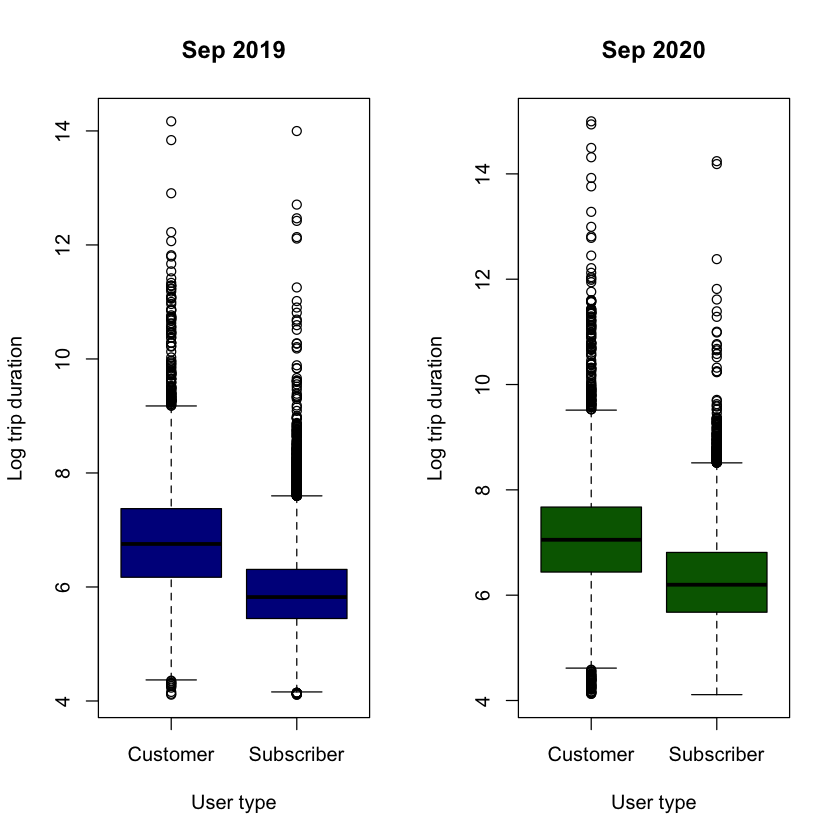

In [52]:
# User type analysis
par(mfrow=c(1,2))
boxplot(log_trip~usertype, data=clean.data_2019, main="Sep 2019", col="darkblue",
   xlab="User type", ylab="Log trip duration")
boxplot(log_trip~usertype, data=clean.data_2020, main="Sep 2020", col="darkgreen",
   xlab="User type", ylab="Log trip duration")

Warning message in histogram.factor(clean.data_2019$start.station.name, data = clean.data_2019, :
“explicit 'data' specification ignored”
Warning message in histogram.factor(clean.data_2020$start.station.name, data = clean.data_2020, :
“explicit 'data' specification ignored”


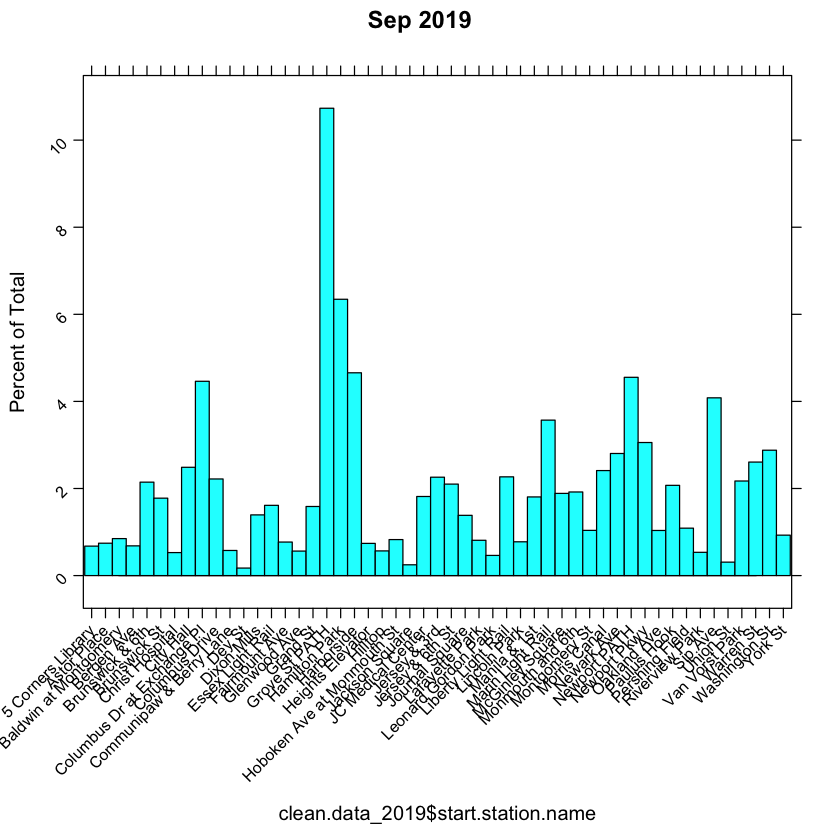

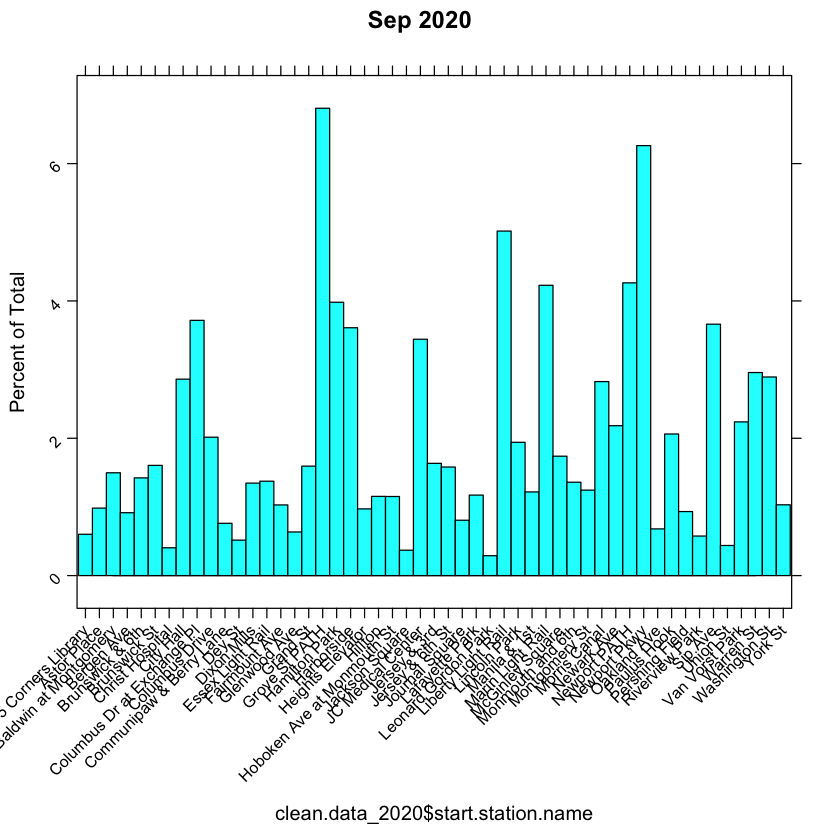

In [51]:
# Station trips distribution

histogram(clean.data_2019$start.station.name, data = clean.data_2019, main='Sep 2019', scales=list(y=list(rot=45), x=list(rot=45)))
histogram(clean.data_2020$start.station.name, data = clean.data_2020, main='Sep 2020', scales=list(y=list(rot=45), x=list(rot=45)))

`geom_smooth()` using formula 'y ~ x'

Warning message:
“Removed 5 rows containing missing values (geom_segment).”


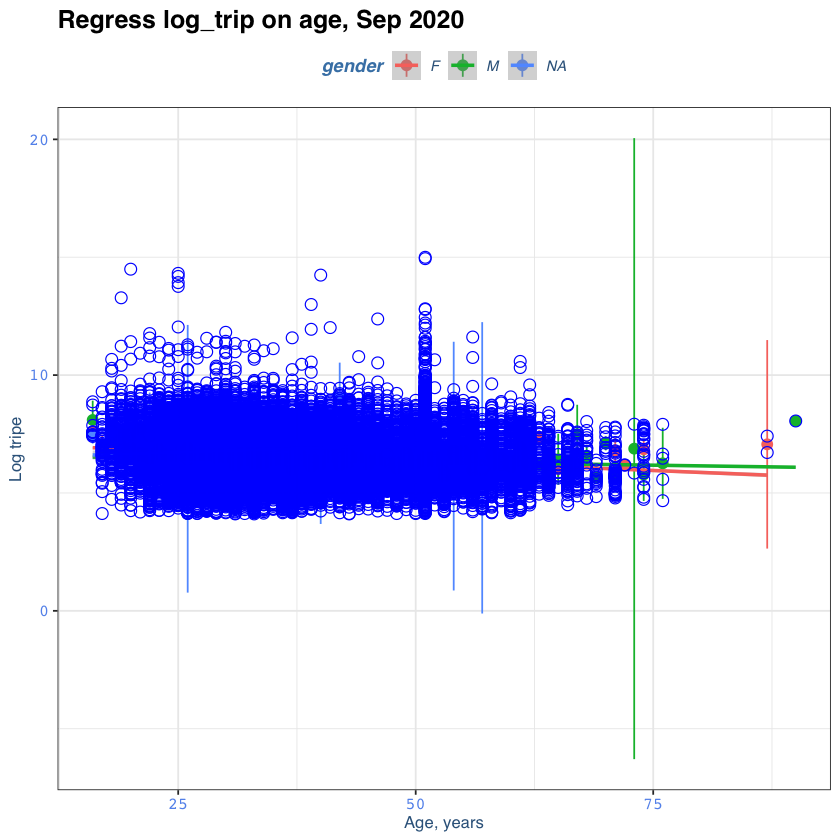

In [42]:
# plot 
degree_plot <- ggplot(clean.data_2020, aes(age, log_trip, color = gender)) + stat_summary(fun.data= mean_cl_normal) + 
  geom_smooth(method='lm')  + geom_point(na.rm=TRUE, color="blue", size=3, pch=21)
mynamestheme <- theme(plot.title = element_text(family = "Helvetica", face = "bold", size = (15)), 
                 legend.title = element_text(colour = "steelblue",  face = "bold.italic", family = "Helvetica"), 
                 legend.text = element_text(face = "italic", colour="steelblue4",family = "Helvetica"), 
                  axis.title = element_text(family = "Helvetica", size = (10), colour = "steelblue4"),
                  axis.text = element_text(family = "Courier", colour = "cornflowerblue", size = (10)))
  
print(degree_plot + mynamestheme + labs( title= "Regress log_trip on age, Sep 2020", y="Log tripe", x = "Age, years"))

#### Join datasets and save clean data to csv file 

In [43]:
merge_data <- full_join(clean.data_2020, clean.data_2019)
str(merge_data)

Joining, by = c("tripduration", "starttime", "stoptime", "start.station.id", "start.station.name", "start.station.latitude", "start.station.longitude", "end.station.id", "end.station.name", "end.station.latitude", "end.station.longitude", "bikeid", "usertype", "birth.year", "gender", "age", "log_trip", "year")



'data.frame':	103049 obs. of  18 variables:
 $ tripduration           : int  222 193 273 1419 254 1621 293 1981 3465 641 ...
 $ starttime              : Factor w/ 103077 levels "2020-09-01 00:15:58.6470",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ stoptime               : Factor w/ 103076 levels "2020-09-01 00:19:40.8750",..: 1 2 3 5 4 6 7 8 16 10 ...
 $ start.station.id       : int  3186 3640 3191 3203 3194 3225 3212 3199 3203 3212 ...
 $ start.station.name     : Factor w/ 51 levels "5 Corners Library",..: 18 28 47 19 35 3 7 41 19 7 ...
 $ start.station.latitude : num  40.7 40.7 40.7 40.7 40.7 ...
 $ start.station.longitude: num  -74 -74.1 -74.1 -74 -74.1 ...
 $ end.station.id         : int  3276 3206 3694 3270 3679 3199 3640 3212 3199 3225 ...
 $ end.station.name       : Factor w/ 84 levels "12 Ave & W 40 St",..: 45 31 33 37 6 54 38 11 54 5 ...
 $ end.station.latitude   : num  40.7 40.7 40.7 40.7 40.7 ...
 $ end.station.longitude  : num  -74 -74.1 -74.1 -74 -74.1 ...
 $ bikeid                 : 

In [44]:
write.csv(x=merge_data, file="data/bike_data.csv")